<a href="https://colab.research.google.com/github/Alejandroe0/Computacional/blob/main/M%C3%A9todoDeEuler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Euler.

Tomaremos el movimiento de un proyectil, y calcularemos las soluciones numéricas utilizando el método de Euler. Para el análisis físico se tomarán dos casos diferentes. Con resistencia del aire, y sin resistencia.

Para esto se analizó que las cuatro ecuaciones utiles serán:

\begin{cases}
\frac{d\vec{x}}{dt}&=v_x\\
m\frac{d\vec{v_x}}{dt}&=-B_2vv_x\\
\frac{dy}{dt}&=v_y\\
m\frac{dv_y}{dt}&=-mg-B_2vv_y\\
\end{cases}


Utilizando el metodo de Euler, las ecuaciones a implementar para el proceso iterativo con resistencia del aire serán:

\begin{cases}
x_{n+1}&=x_n+v_{n}^x\Delta t\\
v_{n+1}^x&=v_n^x-\frac{B_2v_nv_{n}^x}{m}Δt\\
y_{n+1}&=y_n+v_{n}^yΔt\\
v_{n+1}^y&=v_n^y-gΔt-\frac{B_2v_nv_{n}^y}{m}Δt
\end{cases}

# 1. Definir la función de Python proyectil que resuelva las ecuaciones diferenciales 1.22, donde uno de los parámetros sea $\frac{B}{m}$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Definimos la funcion con resistencia del aire
def proyectil(B2m, g, v0, theta, N_max, dt):
  x=[]
  y=[]
  v_x=[]
  v_y=[]
  t=[]
  x.append(0)
  y.append(0)
  t.append(0)
  v_x.append(v0*np.cos(theta))
  v_y.append(v0*np.sin(theta))
  for i in range(N_max):
    #Agrego a la lista el nuevo valor de x
    x.append(x[i]+v_x[i]*dt)
    #Agrego a la lista el nuevo valor de y
    y.append(y[i]+v_y[i]*dt)
    #Agrego a la lista el nuevo valor de t
    t.append(t[i]+dt)
    #Calculo el valor de v usando sus componentes
    v=np.sqrt(v_x[i]**2+v_y[i]**2)
    #Calculo a la lista el nuevo valor de vx
    v_x.append(v_x[i]-B2m*v*v_x[i]*dt)
    #Calculo a la lista el nuevo valor de vy
    v_y.append(v_y[i]-g*dt-B2m*v*v_y[i]*dt)
  return x,y,t,v_x,v_y

# 2. Calcular la trayectoria del proyectil con y sin resistencia del aire y comentar los resultados.

In [ ]:
#Calculamos con un factor de resitancia B/m = 0.00004
sol_resistencia = proyectil(0.00004, 9.8, 700, np.pi/6, 1000000, 0.001)

#Calculamos sin factor de resistencia
sol_sin_resistencia = proyectil(0, 9.8, 700, np.pi/6, 1000000, 0.001)

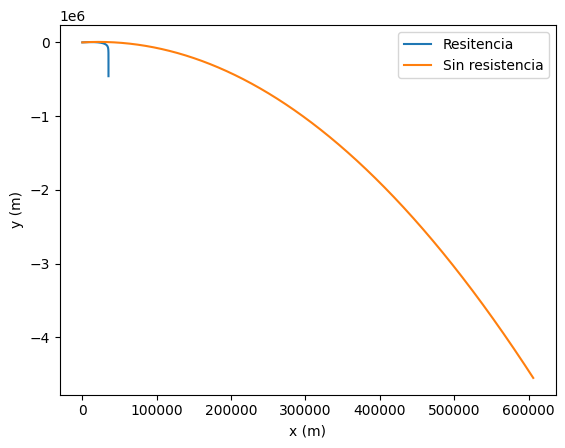

In [ ]:
#Graficamos la solucion con resistencia del aire
plt.plot(sol_resistencia[0],sol_resistencia[1],label='Resitencia')
plt.plot(sol_sin_resistencia[0],sol_sin_resistencia[1],label='Sin resistencia')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.show()

Notemos que a pesar de que el factor de $\frac{B}{m}$ es bastante pequeño, la diferencia de trayectorias es significativamente grande. En el siguiente inciso se analizarán las trayectorias con valores positivos para tener una idea más clara.

# 3. Determinar el alcance del proyectil (valor máximo de $x$), es decir, interrumpiendo la función cuando el valor de $y$ sea igual o menor a 0 (modificar la función proyectil).

In [ ]:
def proyectil2(B2m, g, v0, theta, N_max, dt):
  x=[]
  y=[]
  v_x=[]
  v_y=[]
  t=[]
  x.append(0)
  y.append(0)
  t.append(0)
  v_x.append(v0*np.cos(theta))
  v_y.append(v0*np.sin(theta))
  for i in range(N_max):
    #Agrego a la lista el nuevo valor de x
    x.append(x[i]+v_x[i]*dt)
    #Agrego a la lista el nuevo valor de y
    y.append(y[i]+v_y[i]*dt)
    #Agrego a la lista el nuevo valor de t
    t.append(t[i]+dt)
    #Calculo el valor de v usando sus componentes
    v=np.sqrt(v_x[i]**2+v_y[i]**2)
    #Calculo a la lista el nuevo valor de vx
    v_x.append(v_x[i]-B2m*v*v_x[i]*dt)
    #Calculo a la lista el nuevo valor de vy
    v_y.append(v_y[i]-g*dt-B2m*v*v_y[i]*dt)

    #Determino si el nuevo valor de y es menor o igual a 0
    if y[i+1]<=0:
      break

  return x,y,t,v_x,v_y

In [ ]:
#Calculamos con un factor de resitancia B/m = 0.00004
sol_resistencia_max = proyectil2(0.00004, 9.8, 700, np.pi/6, 1000000, 0.001)

#Calculamos sin factor de resistencia
sol_sin_resistencia_max = proyectil2(0, 9.8, 700, np.pi/6, 1000000, 0.001)

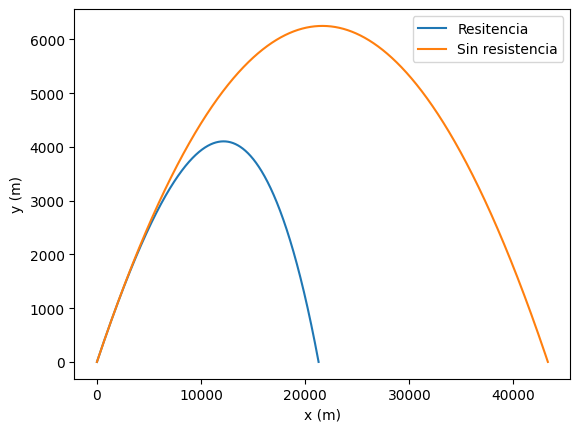

In [ ]:
#Graficamos la solucion con resistencia del aire
plt.plot(sol_resistencia_max[0],sol_resistencia_max[1],label='Resitencia')
plt.plot(sol_sin_resistencia_max[0],sol_sin_resistencia_max[1],label='Sin resistencia')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.show()

Veamos que la resistencia del aire, tal como se esperaba, reduce la trayectoria ya que desacelra la partícula en los movimientos de ambos ejes. Tambien es posible ver que la trayectoria no es una parabola simétrica. Esto dedibo a que la desaceleración tiene más peso en cada iteración en $Δt$.

# 4. En el caso en el que no se tiene resistencia del aire, sabemos de los cursos de física básica que el alcance máximo se obtiene con un ángulo de $45°$. Verificar esto numéricamente variando el valor de $θ$.

In [ ]:
#Hacemos el ciclo for que ira iterando los diferentes grados
#La variable de alcances maximos
alcance_max=[]
#Lista donde se almacenan los resultados para graficar trayectorias
trayec_max=[]
#Ciclo for que itera los grados
for i in range(0,90,9):
  #Calcula los alcances
  sol_sin_resistencia_max = proyectil2(0, 9.8, 700, np.pi*i/180, 1000000, 0.001)
  #Agrego a la lista el alcance maximo
  alcance_max.append(sol_sin_resistencia_max[0][-1])
  #Agrego a la lista la trayectoria
  trayec_max.append([sol_sin_resistencia_max[0],sol_sin_resistencia_max[1]])

Como dividimos los 90 grados de un cuadrante, en 10 intervalos iguales, solo buscamos el indice del valor máximo y lo multiplicamos por 9, así tendremos los grados del valor máximo.

In [ ]:
alcance_max.index(max(alcance_max))*9

45

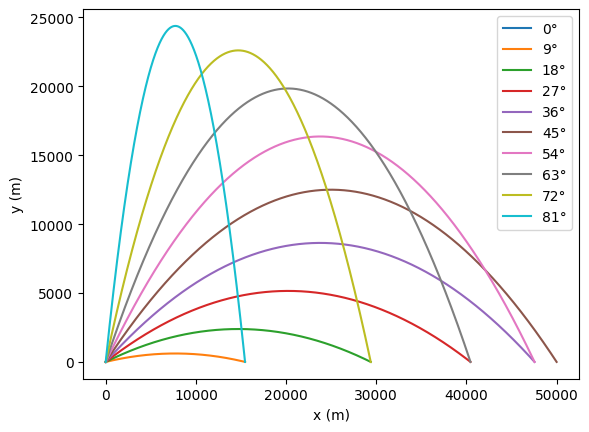

In [ ]:
#Grficamos las trayectorias almacendas
for i in range(len(trayec_max)):
  plt.plot(trayec_max[i][0],trayec_max[i][1],label=str(i*9)+'°')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.show()

Vemos que efectivamente el alcance máximo ocurre a los $45°$ grados de inclinación

# 5. Si se tiene resistencia del aire, determine numéricamente con qué ángulo se obtiene el alcance máximo.

In [ ]:
#Hacemos el ciclo for que ira iterando los diferentes grados
#La variable de alcances maximos
alcance_max_res=[]
#Lista donde se almacenan los resultados para graficar trayectorias
trayec_max_res=[]
#Ciclo for que itera los grados
for i in range(0,90,3):
  #Calcula los alcances
  sol_resistencia_max = proyectil2(0.00004, 9.8, 700, np.pi*i/180, 1000000, 0.001)
  #Agrego a la lista el alcance maximo
  alcance_max_res.append(sol_resistencia_max[0][-1])
  #Agrego a la lista la trayectoria
  trayec_max_res.append([sol_resistencia_max[0],sol_resistencia_max[1]])

Como dividimos los 90 grados de un cuadrante, en 30 intervalos iguales, solo buscamos el indice del valor máximo y lo multiplicamos por 3, así tendremos los grados del valor máximo.

In [ ]:
alcance_max_res.index(max(alcance_max_res))*3

39

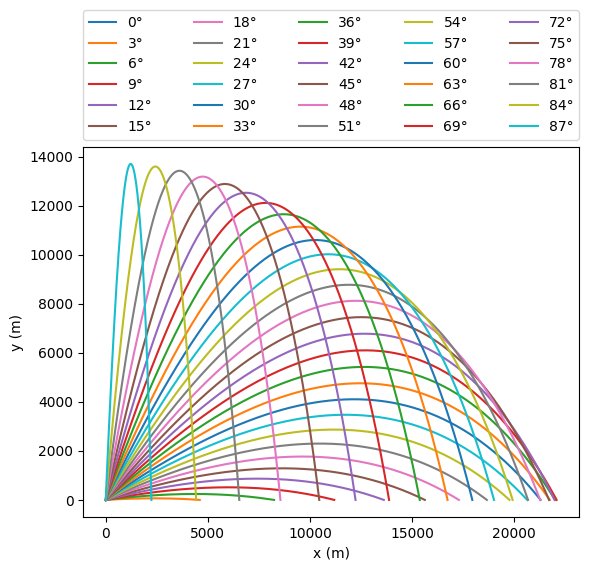

In [ ]:
#Grficamos las trayectorias almacendas
for i in range(len(trayec_max_res)):
  plt.plot(trayec_max_res[i][0],trayec_max_res[i][1],label=str(i*3)+'°')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0, ncol=5, mode="expand",
           borderaxespad=0)
plt.show()